**Walmart - Confidence Interval and CLT**

Walmart is an American multinational retail corporation that operates a chain of supercenters,
discount departmental stores, and grocery stores from the United States. Walmart has more
than 100 million customers worldwide.

**Business Problem**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer's gender and the various other factors to help the business make better decisions.
They want to understand if the spending habits differ between male and female customers:

Do women spend more on Black Friday than men?

(Assume 50 million customers are male and 50 million are female).

**Understanding the Dataset**

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

User_ID: User ID

Product_ID: Product ID

Gender: Sex of User

Age: Age in bins

Occupation: Occupation(Masked)

City_Category: Category of the City (A,B,C)

StayInCurrentCityYears: Number of years stay in current city

Marital_Status: Marital Status

ProductCategory: Product Category (Masked)

Purchase: Purchase Amount


Colab Notebook: https://colab.research.google.com/drive/1aXEqARWVhGhwRkxv5YXiI6lrZtPGoKKP#scrollTo=-ETEKz7X0j7O




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF # Empirical CDF
from scipy.stats import norm,  ttest_ind, ttest_rel, ttest_1samp
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094 -O walmart_data.csv
df_walmart=pd.read_csv("walmart_data.csv")

--2023-10-02 16:01:53--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 99.84.178.226, 99.84.178.172, 99.84.178.132, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|99.84.178.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘walmart_data.csv’

walmart_data.csv    100%[===================>]  21.96M  89.1MB/s    in 0.2s    

2023-10-02 16:01:53 (89.1 MB/s) - ‘walmart_data.csv’ saved [23027994/23027994]



In [ ]:
df_walmart.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
df_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df_walmart.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
df_walmart.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df_walmart['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
df_walmart['Product_ID'].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
       'P00371644', 'P00370853'], dtype=object)

In [ ]:
#Shape of the dataframe: Total number of records is (550068, 10)
df_walmart.shape

(550068, 10)

In [ ]:
df_walmart.duplicated().sum()

0

In [ ]:
df_walmart.nunique().sort_values(ascending=False)

Purchase                      18105
User_ID                        5891
Product_ID                     3631
Occupation                       21
Product_Category                 20
Age                               7
Stay_In_Current_City_Years        5
City_Category                     3
Gender                            2
Marital_Status                    2
dtype: int64

In [ ]:
df_walmart['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

AVERAGE PURCHASE VALUE FOR EACH GENDER is:  Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64


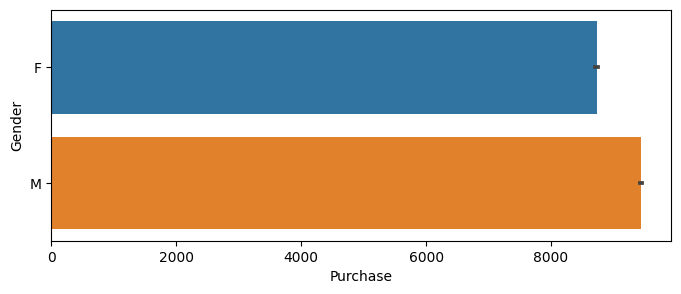

In [ ]:
#Average purchase by Gender
avg_purchase_by_gender=df_walmart.groupby('Gender')['Purchase'].mean()
print("AVERAGE PURCHASE VALUE FOR EACH GENDER is: ", avg_purchase_by_gender)
plt.figure(figsize=(8,3))
sns.barplot(y=df_walmart['Gender'], x=df_walmart['Purchase'])
plt.show()

In [ ]:
#Total number of male and female customers
nFemale = df_walmart[df_walmart['Gender'] == 'F']['User_ID'].nunique()
nMale = df_walmart[df_walmart['Gender'] == 'M']['User_ID'].nunique()
nTotal=df_walmart['User_ID'].nunique()
print("Total number of Male customers is: ", nMale)
print("Total number of Female customers is: ", nFemale)
print("Total number of customers is (both Male & Female): ", nTotal)
percent_male_customers=np.round( nMale * 100 / nTotal, 2 )
percent_female_customers=np.round( nFemale * 100 / nTotal, 2 )
print("Percentage of Male customers is: ", percent_male_customers)
print("Percentage of Female customers is: ", percent_female_customers)

Total number of Male customers is:  4225
Total number of Female customers is:  1666
Total number of customers is (both Male & Female):  5891
Percentage of Male customers is:  71.72
Percentage of Female customers is:  28.28


<Axes: ylabel='User_ID'>

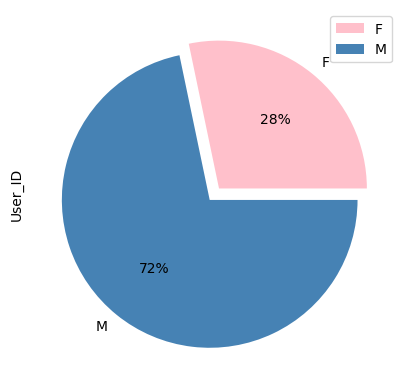

In [ ]:
# Percentage of Male and Female Users
colors = ['pink', 'steelblue']
# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05)
df_walmart.groupby(['Gender']).nunique().plot(
    kind='pie', y='User_ID', autopct='%1.0f%%',
  colors=colors, explode=explode)

In [ ]:
#Male vs Female purchases
df_purchase=df_walmart['Purchase']
df_female_purchase = df_walmart[df_walmart['Gender'] == 'F']['Purchase']
df_male_purchase = df_walmart[df_walmart['Gender'] == 'M']['Purchase']
print("Aggregated Purchase amount of Male customers is: ", df_male_purchase.sum())
print("Aggregated Purchase amount of Female customers is: ", df_female_purchase.sum())
print("Aggregated Purchase amount of all customers is: ", df_purchase.sum())
print("Purchase share of Female customers is: ", np.round( (df_female_purchase.sum() * 100) / df_purchase.sum(), 2 ))
print("Purchase share of Male customers is: ",   np.round( (df_male_purchase.sum()   * 100 ) / df_purchase.sum(), 2))

print("Total no. of store visits/purchases done by Male customers is: ", len(df_male_purchase))
print("Total no. of store visits/purchases done by Female customers is: ", len(df_female_purchase))
print("Average store visits of Female customers is: ", np.round( len(df_female_purchase)/df_female_purchase.nunique(), 0))
print("Average store visits of Male customers is: ", np.round( len(df_male_purchase)/df_male_purchase.nunique() , 0))


Aggregated Purchase amount of Male customers is:  3909580100
Aggregated Purchase amount of Female customers is:  1186232642
Aggregated Purchase amount of all customers is:  5095812742
Purchase share of Female customers is:  23.28
Purchase share of Male customers is:  76.72
Total no. of store visits/purchases done by Male customers is:  414259
Total no. of store visits/purchases done by Female customers is:  135809
Average store visits of Female customers is:  9.0
Average store visits of Male customers is:  24.0


<Axes: ylabel='Purchase'>

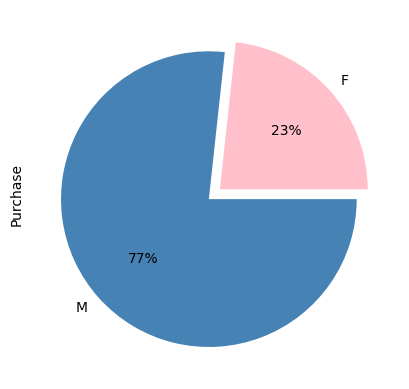

In [ ]:
# Percentage of 'aggregated spend' by Male and Female Users
colors = ['pink', 'steelblue']
# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05)
df_walmart.groupby(['Gender'])['Purchase'].sum().plot(
    kind='pie', y='Purchase', autopct='%1.0f%%',
  colors=colors, explode=explode)

In [ ]:
df_purchase.describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [ ]:
df_male_purchase.describe()

count    414259.00000
mean       9437.52604
std        5092.18621
min          12.00000
25%        5863.00000
50%        8098.00000
75%       12454.00000
max       23961.00000
Name: Purchase, dtype: float64

In [ ]:
df_female_purchase.describe()

count    135809.000000
mean       8734.565765
std        4767.233289
min          12.000000
25%        5433.000000
50%        7914.000000
75%       11400.000000
max       23959.000000
Name: Purchase, dtype: float64

In [ ]:
#Outlier data in terms of purchase amount
p_25 = df_purchase.quantile(0.25) # Q1 or p_25
p_50 = df_purchase.quantile(0.5)  # Q2 or p_50 or median
p_75 = df_purchase.quantile(0.75) # Q3 or p_75
print("The 25, 50 and 75 percentile values are: ", p_25, ", ", p_50, ", ", p_75)
iqr = p_75 - p_25
lower = max( 0, (p_25 - 1.5*iqr) )
upper = min( df_purchase.max() , (p_75 + 1.5*iqr) )
#print((p_25 - 1.5*iqr), df_purchase.max(), (p_75 + 1.5*iqr))
print("The values for iqr, lower and upper are: ", iqr, ", ", lower, ", ", upper)

The 25, 50 and 75 percentile values are:  5823.0 ,  8047.0 ,  12054.0
The values for iqr, lower and upper are:  6231.0 ,  0 ,  21400.5


In [ ]:
#Outlier Analysis for Wlmart customer purchases
purchase_upper_outlier = df_purchase[df_purchase > upper]
purchase_lower_outlier = df_purchase[df_purchase < lower]
print("The number of outlier records on the right and left are: ", len(purchase_upper_outlier), ", ", len(purchase_lower_outlier))

The number of outlier records on the right and left are:  2677 ,  0


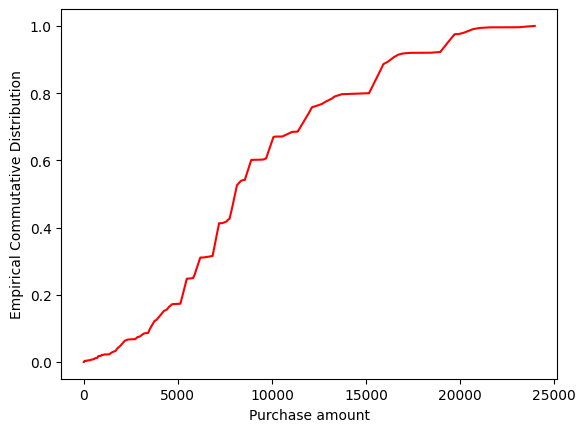

In [ ]:
#ECDF analysis for the purchase amounts from the dataset
e = ECDF(df_purchase)
plt.plot(e.x, e.y, c = "r")
plt.xlabel("Purchase amount", fontsize = 10)
plt.ylabel("Empirical Commutative Distribution", fontsize = 10)
plt.show()

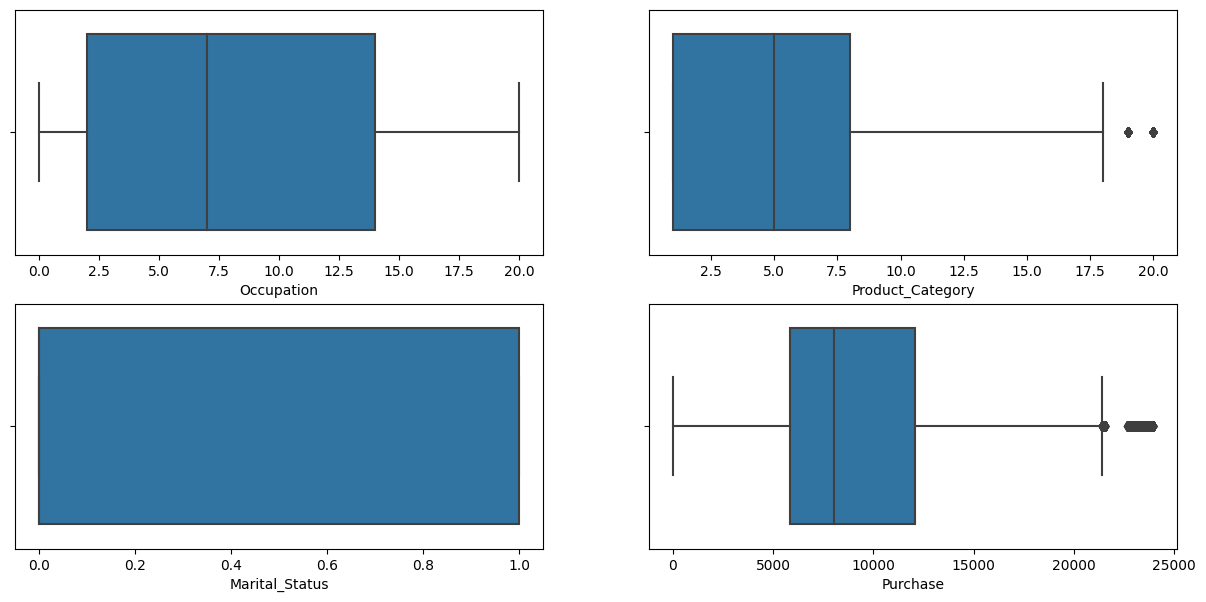

In [ ]:
#Detect outliers using boxplot(Univariate Analysis)
fig, axis= plt.subplots(2, 2, figsize=(15,7))
sns.boxplot(data=df_walmart, x="Occupation", orient='h', ax=axis[0,0])
sns.boxplot(data=df_walmart, x="Product_Category", orient='h', ax=axis[0,1])
sns.boxplot(data=df_walmart, x="Marital_Status", orient='h', ax=axis[1,0])
sns.boxplot(data=df_walmart, x="Purchase", orient='h', ax=axis[1,1])
plt.show()

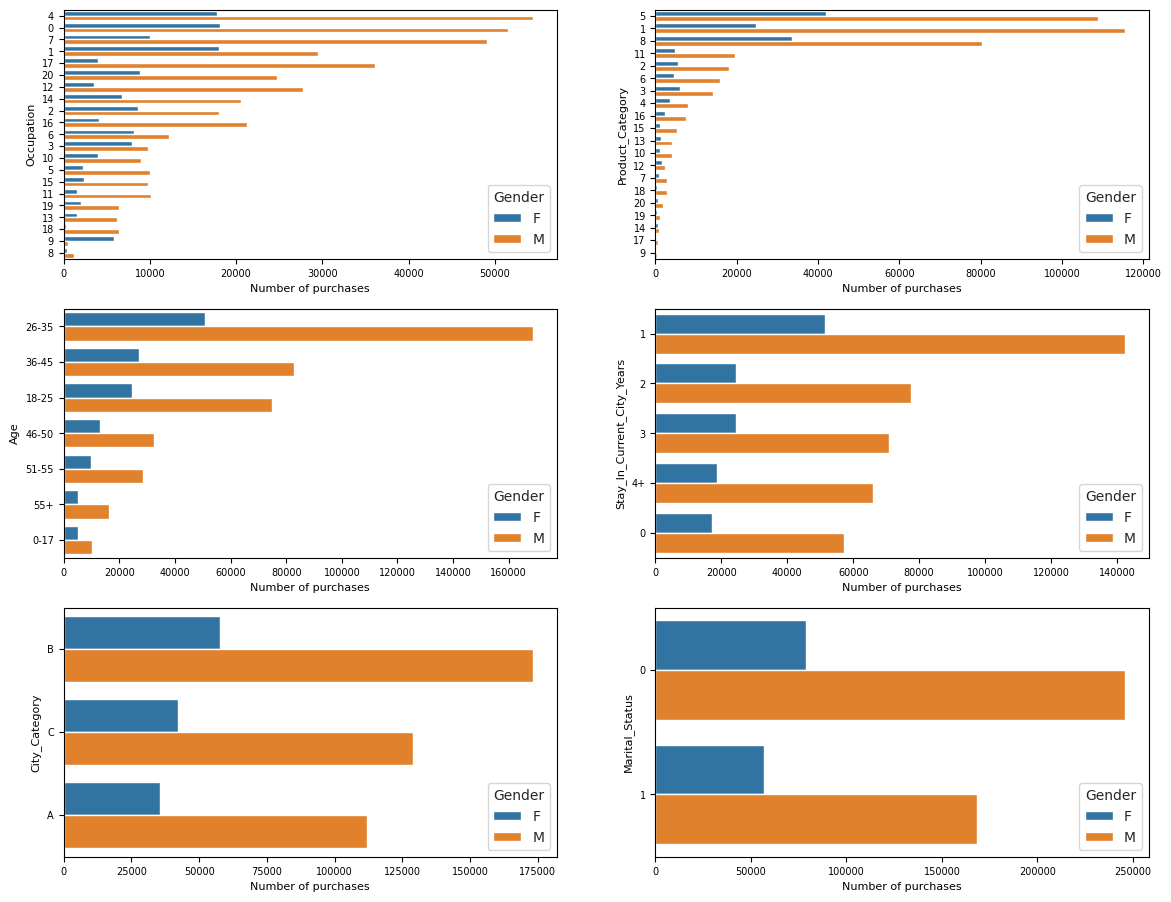

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(14,11))
sns.set_style("whitegrid")

plt.subplot(3,2,1)
sns.countplot(data=df_walmart, y='Occupation', order=df_walmart['Occupation'].value_counts().index, hue='Gender')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel("Number of purchases", fontsize=8)
plt.ylabel("Occupation", fontsize=8)
#plt.title('Number of purchases by occupation', fontsize=8)

plt.subplot(3,2,2)
sns.countplot(data=df_walmart, y='Product_Category', order=df_walmart['Product_Category'].value_counts().index, hue='Gender')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel("Number of purchases", fontsize=8)
plt.ylabel("Product_Category", fontsize=8)
#plt.title('Number of purchases by Product Category', fontsize=8)

plt.subplot(3,2,3)
sns.countplot(data=df_walmart, y='Age', order=df_walmart['Age'].value_counts().index, hue='Gender')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel("Number of purchases", fontsize=8)
plt.ylabel("Age", fontsize=8)
#plt.title('Number of purchases by age', fontsize=8)

plt.subplot(3,2,4)
sns.countplot(data=df_walmart, y='Stay_In_Current_City_Years', order=df_walmart['Stay_In_Current_City_Years'].value_counts().index, hue='Gender')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel("Number of purchases", fontsize=8)
plt.ylabel("Stay_In_Current_City_Years", fontsize=8)
#plt.title('Number of purchases by Stay_In_Current_City_Years', fontsize=8)

plt.subplot(3,2,5)
sns.countplot(data=df_walmart, y='City_Category', order=df_walmart['City_Category'].value_counts().index, hue='Gender')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel("Number of purchases", fontsize=8)
plt.ylabel("City_Category", fontsize=8)
#plt.title('Number of purchases by City_Category', fontsize=8)

plt.subplot(3,2,6)
sns.countplot(data=df_walmart, y='Marital_Status', order=df_walmart['Marital_Status'].value_counts().index, hue='Gender')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel("Number of purchases", fontsize=8)
plt.ylabel("Marital_Status", fontsize=8)
#plt.title('Number of purchases by Marital_Status', fontsize=8)

plt.show()


<Figure size 1500x1000 with 0 Axes>

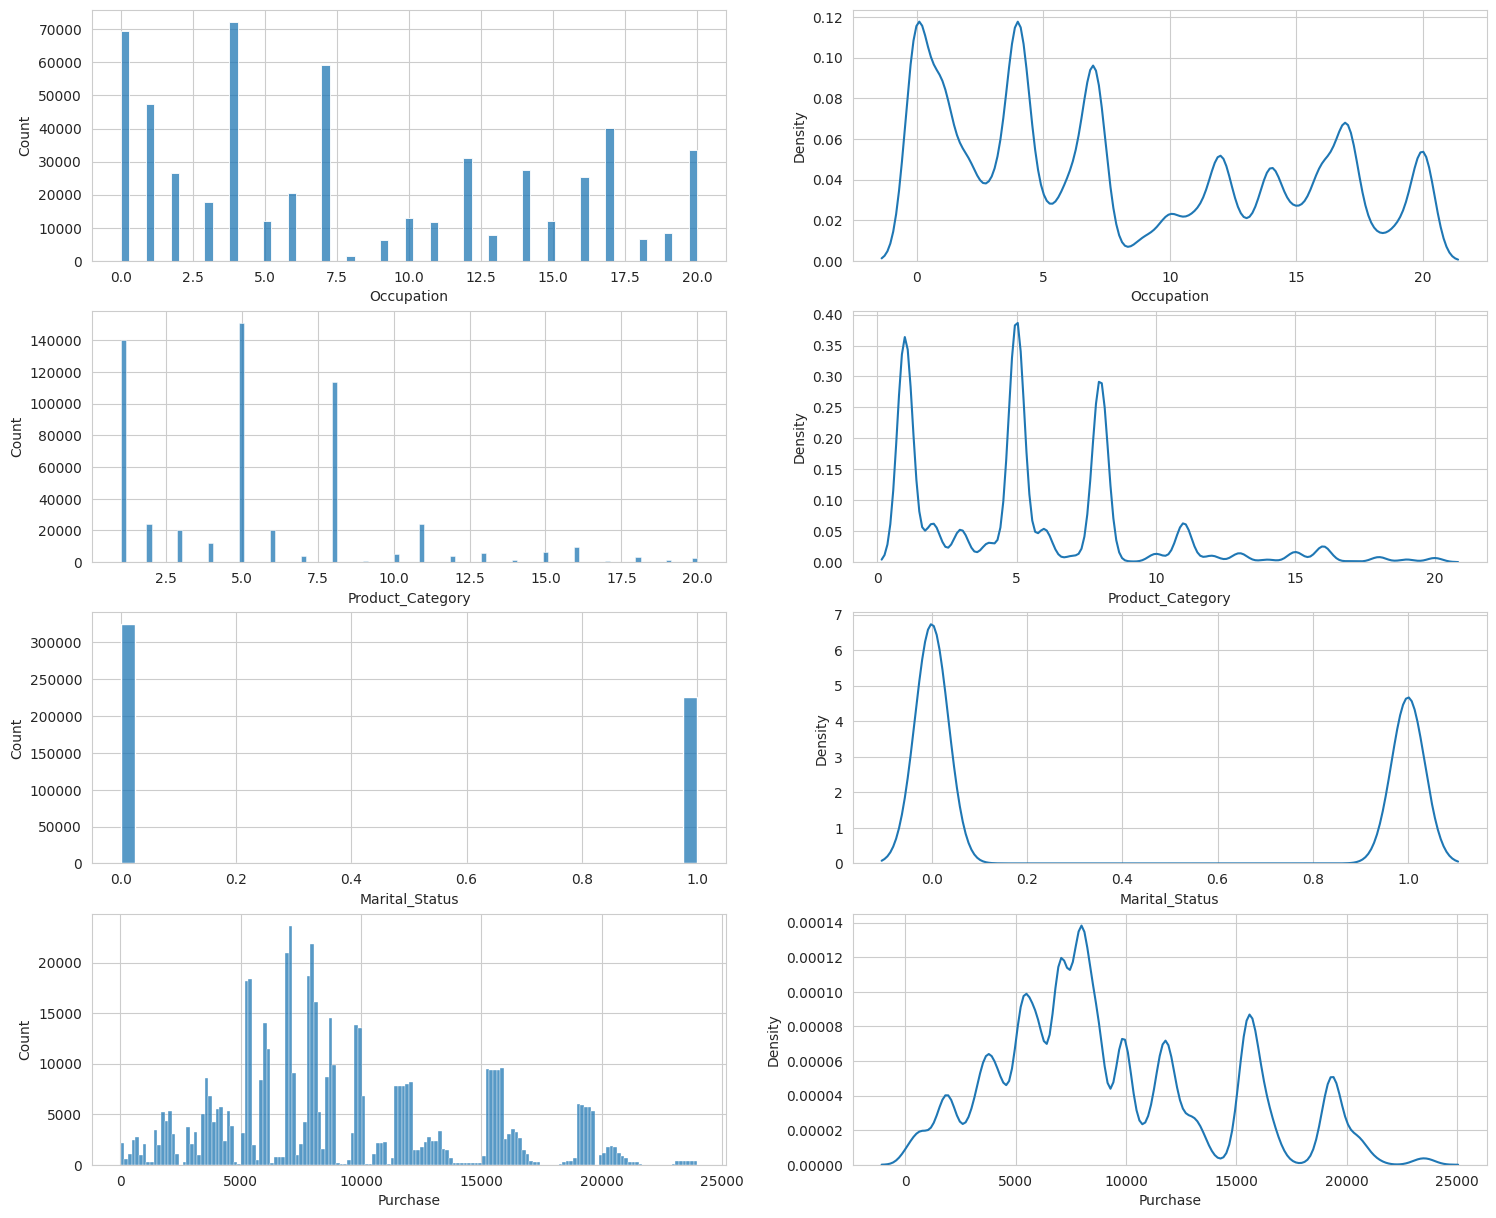

In [ ]:
fig = plt.figure(figsize=(15,10))
fig, axis= plt.subplots(4, 2, figsize=(18,15))
sns.histplot(data=df_walmart, x="Occupation", ax=axis[0, 0])
sns.kdeplot(data=df_walmart, x="Occupation", ax=axis[0, 1])
sns.histplot(data=df_walmart, x="Product_Category", ax=axis[1, 0])
sns.kdeplot(data=df_walmart, x="Product_Category", ax=axis[1, 1])
sns.histplot(data=df_walmart, x="Marital_Status", ax=axis[2, 0])
sns.kdeplot(data=df_walmart, x="Marital_Status", ax=axis[2, 1])
sns.histplot(data=df_walmart, x="Purchase", ax=axis[3,0])
sns.kdeplot(data=df_walmart, x="Purchase", ax=axis[3,1])
plt.show()

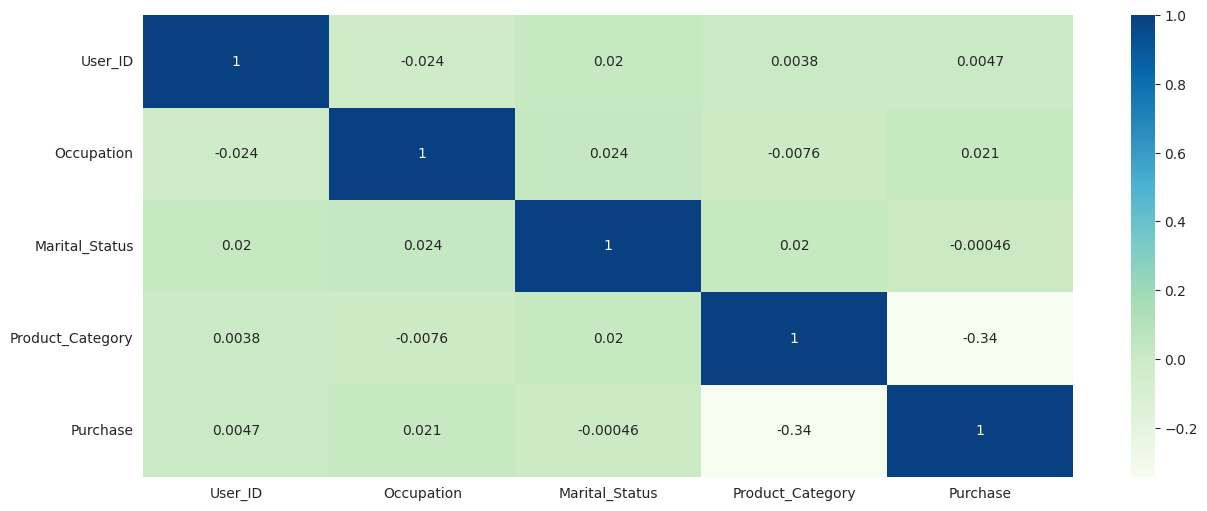

In [ ]:
#Correlation HeatMap
plt.figure(figsize=(15,6))
ax = sns.heatmap(df_walmart.corr(),annot=True,cmap='GnBu')
plt.show()

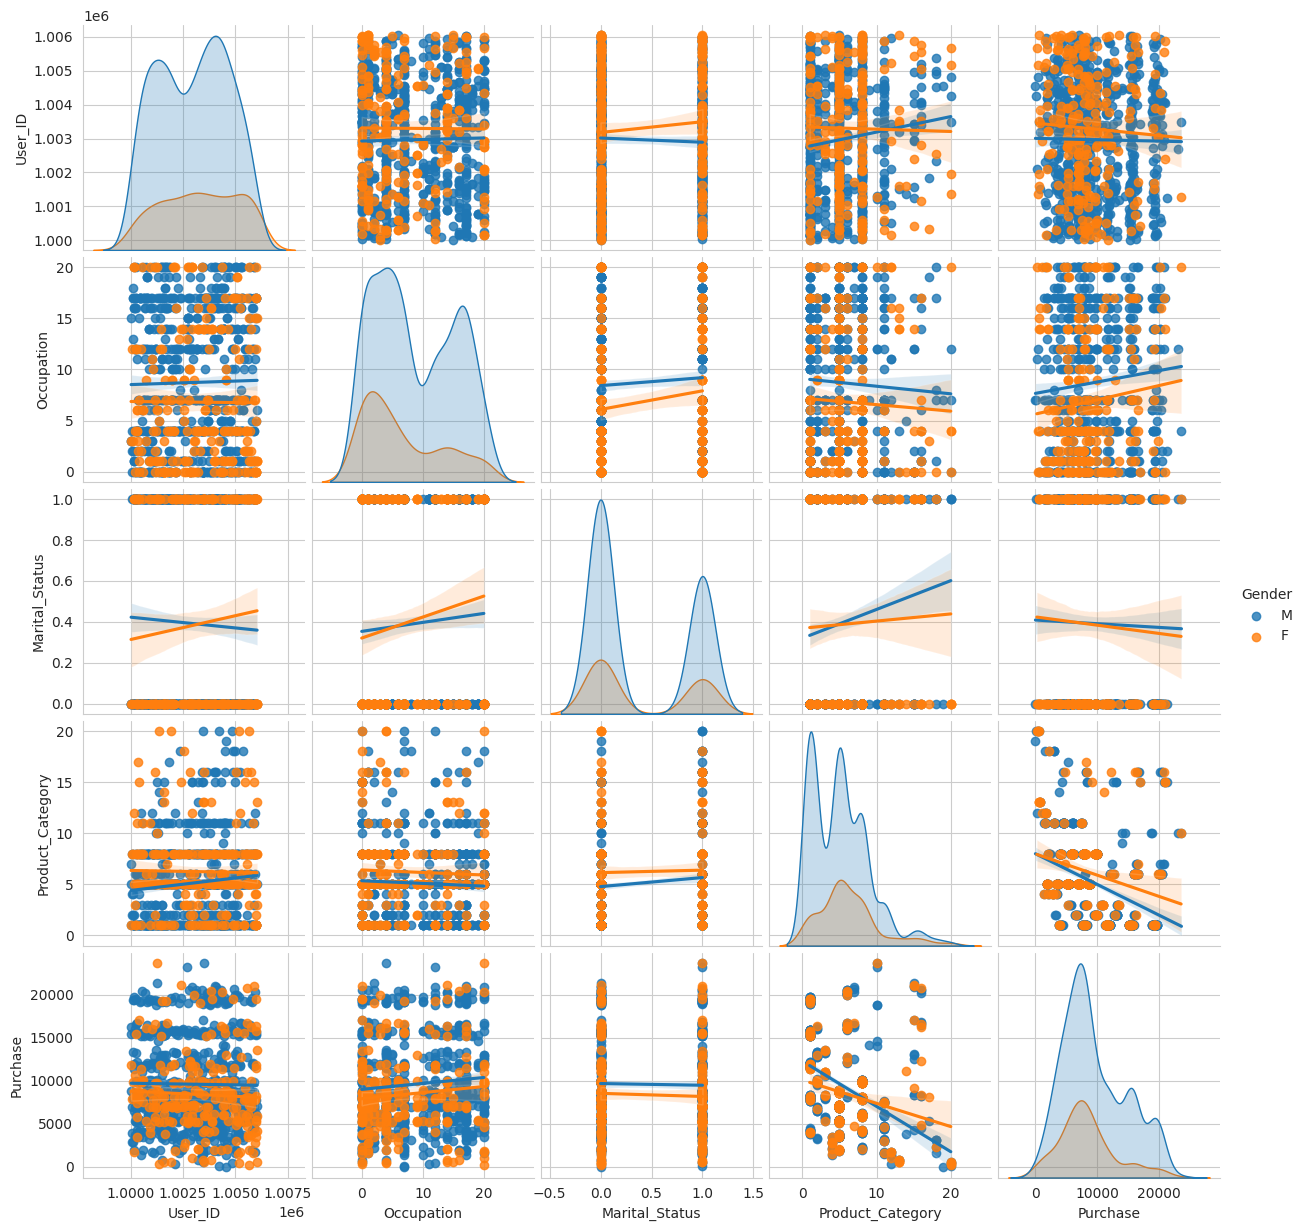

In [ ]:
# Taking a sample of 2000 entries to create pair wise plots
#plt.figure(figsize=(15, 2))
sns.pairplot(df_walmart.sample(1000), hue = 'Gender', kind = 'reg')
plt.show()

**Central Limit Theorem**:

With CLT, the objective is to find a range of values called confidence interval (CI), that helps us make assertion with a degree of confidence as specified.

To calculate the confidence interval (CI), we will have to take a number of random samples and calculate their means. Now, for example, in order to calculate 95 percent confidence interval, we will find the 2.5 and 97.5 percentile values in all the means calculated from these random samples.

"The Central Limit Theorem states that the means of samples taken from any data, follow a gaussian distribution, irrespective of the fact whether the values themselves follow the gaussian distribution or not."

<Figure size 1400x1400 with 0 Axes>

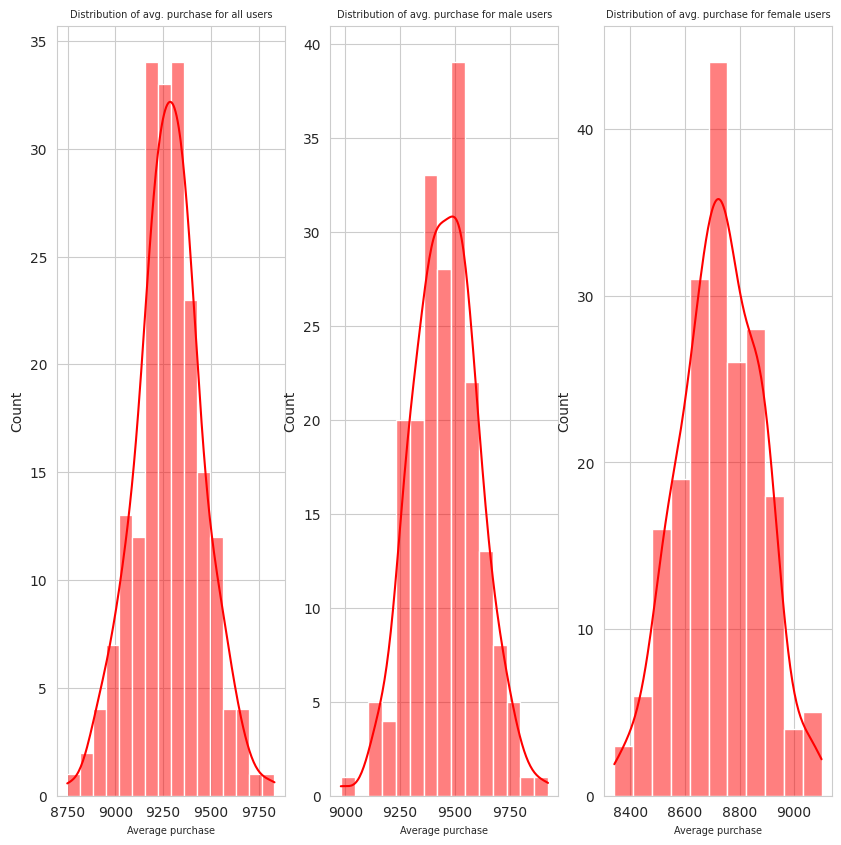

In [ ]:
#Average purchase by gender
fig = plt.figure(figsize=(14,14))
fig, ax= plt.subplots(1, 3, figsize=(10,10))

plt.subplot(1, 3, 1)
sample_mean_1000 = [np.mean(df_walmart['Purchase'].sample(1000))  for i in range(200)]
sns.histplot(data=sample_mean_1000, kde=True, ax=ax[0], color='r')
plt.title('Distribution of avg. purchase for all users', fontsize=7)
plt.xlabel('Average purchase', fontsize=7)

plt.subplot(1, 3, 2)
sample_m_mean_1000 = [np.mean(df_walmart[df_walmart['Gender'] =='M']['Purchase'].sample(1000))  for i in range(200)]
sns.histplot(data=sample_m_mean_1000, kde=True, ax=ax[1], color='r')
plt.title('Distribution of avg. purchase for male users', fontsize=7)
plt.xlabel('Average purchase', fontsize=7)

plt.subplot(1, 3, 3)
sample_f_mean_1000 = [np.mean(df_walmart[df_walmart['Gender'] =='F']['Purchase'].sample(1000))  for i in range(200)]
sns.histplot(data=sample_f_mean_1000, kde=True, ax=ax[2], color='r')
plt.title('Distribution of avg. purchase for female users', fontsize=7)
plt.xlabel('Average purchase', fontsize=7)

plt.show()

In [ ]:
# Finding different confidence intervals for males and females

print('Mean of sample means = ', np.mean(sample_mean_1000).round(2) )
print('Population mean =', np.mean(df_walmart.loc[df_walmart['Gender']=='M', 'Purchase']))
print('Standard deviation of means (Standard Error) =', np.std(sample_mean_1000).round(2))
print('Standard deviation of population =',df_walmart['Purchase'].std().round(2) )
print('90% CONFIDENCE INTERVAL: ')
print((np.percentile(sample_mean_1000, 5).round(2), np.percentile(sample_mean_1000, 95).round(2)))
print('90% CONFIDENCE INTERVAL for Males: ')
print((np.percentile(sample_m_mean_1000, 5).round(2), np.percentile(sample_m_mean_1000, 95).round(2)))
print('90% CONFIDENCE INTERVAL for Females: ')
print((np.percentile(sample_f_mean_1000, 5).round(2), np.percentile(sample_f_mean_1000, 95).round(2)))
print('95% CONFIDENCE INTERVAL: ')
print((np.percentile(sample_mean_1000, 2.5).round(2), np.percentile(sample_mean_1000, 97.5).round(2)))
print('95% CONFIDENCE INTERVAL for Males: ')
print((np.percentile(sample_m_mean_1000, 2.5).round(2), np.percentile(sample_m_mean_1000, 97.5).round(2)))
print('95% CONFIDENCE INTERVAL for Females: ')
print((np.percentile(sample_f_mean_1000, 2.5).round(2), np.percentile(sample_f_mean_1000, 97.5).round(2)))
print('99% CONFIDENCE INTERVAL: ')
print((np.percentile(sample_mean_1000, 0.5).round(2), np.percentile(sample_mean_1000, 99.5).round(2)))
print('99% CONFIDENCE INTERVAL for Males: ')
print((np.percentile(sample_m_mean_1000, 0.5).round(2), np.percentile(sample_m_mean_1000, 99.5).round(2)))
print('99% CONFIDENCE INTERVAL for Females: ')
print((np.percentile(sample_f_mean_1000, 0.5).round(2), np.percentile(sample_f_mean_1000, 99.5).round(2)))


Mean of sample means =  9281.49
Population mean = 9437.526040472265
Standard deviation of means (Standard Error) = 174.08
Standard deviation of population = 5023.07
90% CONFIDENCE INTERVAL: 
(8982.74, 9557.79)
90% CONFIDENCE INTERVAL for Males: 
(9237.13, 9708.6)
90% CONFIDENCE INTERVAL for Females: 
(8492.66, 8934.35)
95% CONFIDENCE INTERVAL: 
(8923.35, 9640.42)
95% CONFIDENCE INTERVAL for Males: 
(9151.66, 9751.58)
95% CONFIDENCE INTERVAL for Females: 
(8429.46, 9022.17)
99% CONFIDENCE INTERVAL: 
(8877.84, 9745.47)
99% CONFIDENCE INTERVAL for Males: 
(9125.77, 9848.54)
99% CONFIDENCE INTERVAL for Females: 
(8367.82, 9080.08)


Observations & Insights:

1) Mean purchase amount for females = 8734.56.

2) Mean purchase amount for males = 9437.52.

3) 95% confidence interval for purchase amounts of females is less than males without any intersection.

4) 'Female' gender spend less than 'Male'. We see this with 95% confidence.

Insights-

1) This is the target product purchase value for customers with Gender='Male' with 95% CI --> (9154.95, 9726.51).

2) This is the target product purchase value for customers with Gender='Female' with 95% CI --> (8417.18, 9017.82).

**Do women spend more than men on Black Friday?
Assume 50 MN men and 50 MN women.**

<Figure size 1000x1500 with 0 Axes>

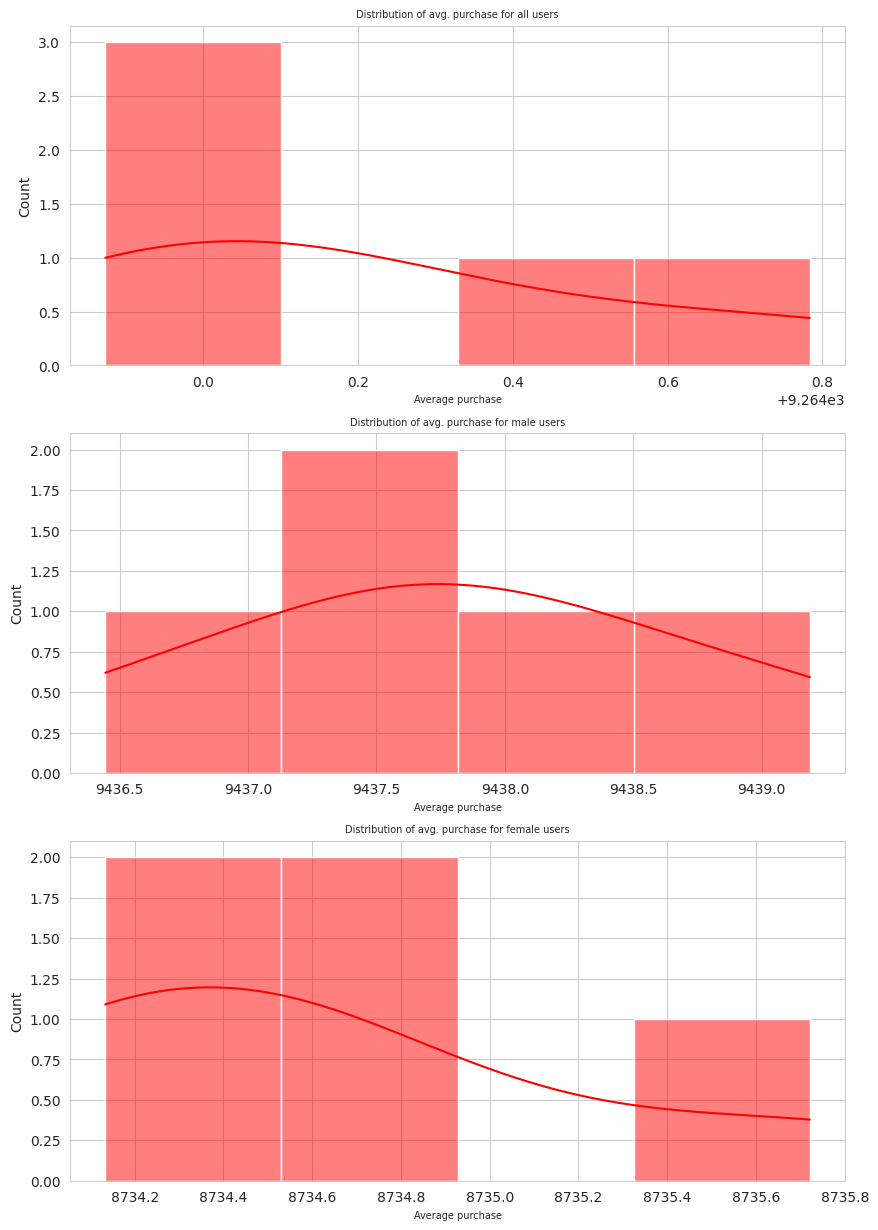

In [ ]:
#Average purchase by gender on black Friday (50 MN male and female customers)
fig = plt.figure(figsize=(10,15))
fig, ax= plt.subplots(3, 1, figsize=(10,15))

plt.subplot(3, 1, 1)
sample_mean_100MN = [np.mean(df_walmart['Purchase'].sample(100000000, replace=True)) for i in range(5)]
sns.histplot(data=sample_mean_100MN, kde=True, ax=ax[0], color='r')
plt.title('Distribution of avg. purchase for all users', fontsize=7)
plt.xlabel('Average purchase', fontsize=7)

plt.subplot(3, 1, 2)
sample_m_mean_50MN = [np.mean(df_walmart[df_walmart['Gender'] =='M']['Purchase'].sample(50000000, replace=True))  for i in range(5)]
sns.histplot(data=sample_m_mean_50MN, kde=True, ax=ax[1], color='r')
plt.title('Distribution of avg. purchase for male users', fontsize=7)
plt.xlabel('Average purchase', fontsize=7)

plt.subplot(3, 1, 3)
sample_f_mean_50MN = [np.mean(df_walmart[df_walmart['Gender'] =='F']['Purchase'].sample(50000000, replace=True))  for i in range(5)]
sns.histplot(data=sample_f_mean_50MN, kde=True, ax=ax[2], color='r')
plt.title('Distribution of avg. purchase for female users', fontsize=7)
plt.xlabel('Average purchase', fontsize=7)

plt.show()

In [ ]:
print('Mean of sample means = ', np.mean(sample_mean_100MN).round(2) )
print('Population mean =', np.mean(df_walmart.loc[df_walmart['Gender']=='M', 'Purchase']))
print('Standard deviation of means (Standard Error) =', np.std(sample_mean_100MN).round(2))
print('Standard deviation of population =', df_walmart['Purchase'].std().round(2) )
print('99% CONFIDENCE INTERVAL: ')
print((np.percentile(sample_mean_100MN, 0.5).round(2), np.percentile(sample_mean_100MN, 99.5).round(2)))
print('99% CONFIDENCE INTERVAL for Males: ')
print((np.percentile(sample_m_mean_50MN, 0.5).round(2), np.percentile(sample_m_mean_50MN, 99.5).round(2)))
print('99% CONFIDENCE INTERVAL for Females: ')
print((np.percentile(sample_f_mean_50MN, 0.5).round(2), np.percentile(sample_f_mean_50MN, 99.5).round(2)))

Mean of sample means =  9264.21
Population mean = 9437.526040472265
Standard deviation of means (Standard Error) = 0.33
Standard deviation of population = 5023.07
99% CONFIDENCE INTERVAL: 
(9263.88, 9264.77)
99% CONFIDENCE INTERVAL for Males: 
(9436.47, 9439.17)
99% CONFIDENCE INTERVAL for Females: 
(8734.13, 8735.7)


**Insight (black friday): We can clearly say with 99% confidence that there is no overlap between Men and Women for a sample of 50MN men and 50 MN women. Therefore, we can safely conclude that Men spent more than Women on Black Friday.**

In [ ]:
#Average purchase by Marital_Status
avg_purchase_by_marital_status=df_walmart.groupby('Marital_Status')['Purchase'].mean()
avg_purchase_by_marital_status

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

<Figure size 800x1200 with 0 Axes>

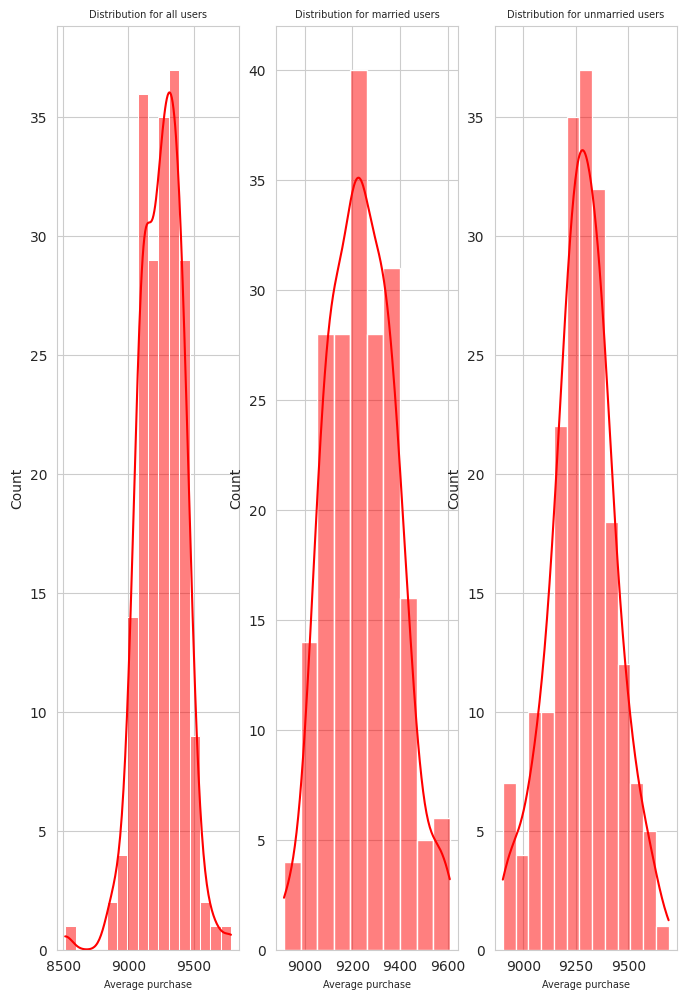

In [ ]:
#Sample mean for Marital Status
fig = plt.figure(figsize=(8,12))
fig, ax= plt.subplots(1, 3, figsize=(8,12))

plt.subplot(1, 3, 1)
sample_mean_1000 = [np.mean(df_walmart['Purchase'].sample(1000))  for i in range(200)]
sns.histplot(data=sample_mean_1000, kde=True, ax=ax[0], color='r')
plt.title('Distribution for all users', fontsize=7)
plt.xlabel('Average purchase', fontsize=7)

plt.subplot(1, 3, 2)
sample_married_mean_1000 = [np.mean(df_walmart[df_walmart['Marital_Status'] == 1]['Purchase'].sample(1000))  for i in range(200)]
sns.histplot(data=sample_married_mean_1000, kde=True, ax=ax[1], color='r')
plt.title('Distribution for married users', fontsize=7)
plt.xlabel('Average purchase', fontsize=7)

plt.subplot(1, 3, 3)
sample_unmarried_mean_1000 = [np.mean(df_walmart[df_walmart['Marital_Status'] == 0]['Purchase'].sample(1000))  for i in range(200)]
sns.histplot(data=sample_unmarried_mean_1000, kde=True, ax=ax[2], color='r')
plt.title('Distribution for unmarried users', fontsize=7)
plt.xlabel('Average purchase', fontsize=7)

plt.show()

In [ ]:
# Finding different confidence intervals for married & unmarried
print('Mean of sample means = ', np.mean(sample_mean_1000).round(2) )
print('Population mean =', np.mean(df_walmart['Purchase']).round(2))
print('Standard deviation of means (Standard Error) =', np.std(sample_mean_1000).round(2))
print('Standard deviation of population =',df_walmart['Purchase'].std().round(2) )
print('90% CONFIDENCE INTERVAL: ')
print((np.percentile(sample_mean_1000, 5.0).round(2), np.percentile(sample_mean_1000, 95.0).round(2)))
print('90% CONFIDENCE INTERVAL for Married: ')
print((np.percentile(sample_married_mean_1000, 5.0).round(2), np.percentile(sample_married_mean_1000, 95.0).round(2)))
print('90% CONFIDENCE INTERVAL for Unmarried: ')
print((np.percentile(sample_unmarried_mean_1000, 5.0).round(2), np.percentile(sample_unmarried_mean_1000, 95.0).round(2)))
print('95% CONFIDENCE INTERVAL: ')
print((np.percentile(sample_mean_1000, 2.5).round(2), np.percentile(sample_mean_1000, 97.5).round(2)))
print('95% CONFIDENCE INTERVAL for Married: ')
print((np.percentile(sample_married_mean_1000, 2.5).round(2), np.percentile(sample_married_mean_1000, 97.5).round(2)))
print('95% CONFIDENCE INTERVAL for Unmarried: ')
print((np.percentile(sample_unmarried_mean_1000, 2.5).round(2), np.percentile(sample_unmarried_mean_1000, 97.5).round(2)))
print('99% CONFIDENCE INTERVAL: ')
print((np.percentile(sample_mean_1000, 0.5).round(2), np.percentile(sample_mean_1000, 99.5).round(2)))
print('99% CONFIDENCE INTERVAL for Married: ')
print((np.percentile(sample_married_mean_1000, 0.5).round(2), np.percentile(sample_married_mean_1000, 99.5).round(2)))
print('99% CONFIDENCE INTERVAL for Unmarried: ')
print((np.percentile(sample_unmarried_mean_1000, 0.5).round(2), np.percentile(sample_unmarried_mean_1000, 99.5).round(2)))

Mean of sample means =  9253.72
Population mean = 9263.97
Standard deviation of means (Standard Error) = 162.87
Standard deviation of population = 5023.07
90% CONFIDENCE INTERVAL: 
(9014.79, 9481.08)
90% CONFIDENCE INTERVAL for Married: 
(9040.07, 9473.34)
90% CONFIDENCE INTERVAL for Unmarried: 
(9022.42, 9531.52)
95% CONFIDENCE INTERVAL: 
(8963.83, 9537.5)
95% CONFIDENCE INTERVAL for Married: 
(9011.21, 9557.7)
95% CONFIDENCE INTERVAL for Unmarried: 
(8949.7, 9581.91)
99% CONFIDENCE INTERVAL: 
(8851.54, 9670.0)
99% CONFIDENCE INTERVAL for Married: 
(8922.34, 9595.99)
99% CONFIDENCE INTERVAL for Unmarried: 
(8908.67, 9626.36)


**Observations**:

1) Average purchase value for married customers is 9261.17.

2) Average purchase value for unmarried customers is 9265.90.

3) For example, there's is overlap between for both in case of their 95% confidence intervals. We don't have enough statistical evidence to compare their expenses.

**Insights**

1) Walmart can target products in the following price range for customers with Marital_Status='Married' with 95% CI --> (8979.49, 9490.5).

2) Walmart can target products in the following price range for customers with Marital_Status='Unmarried' with 95% CI --> (8963.36, 9524.05).

In [ ]:
#Average purchase by Age
avg_purchase_by_age=df_walmart.groupby('Age')['Purchase'].mean()
avg_purchase_by_age

Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64

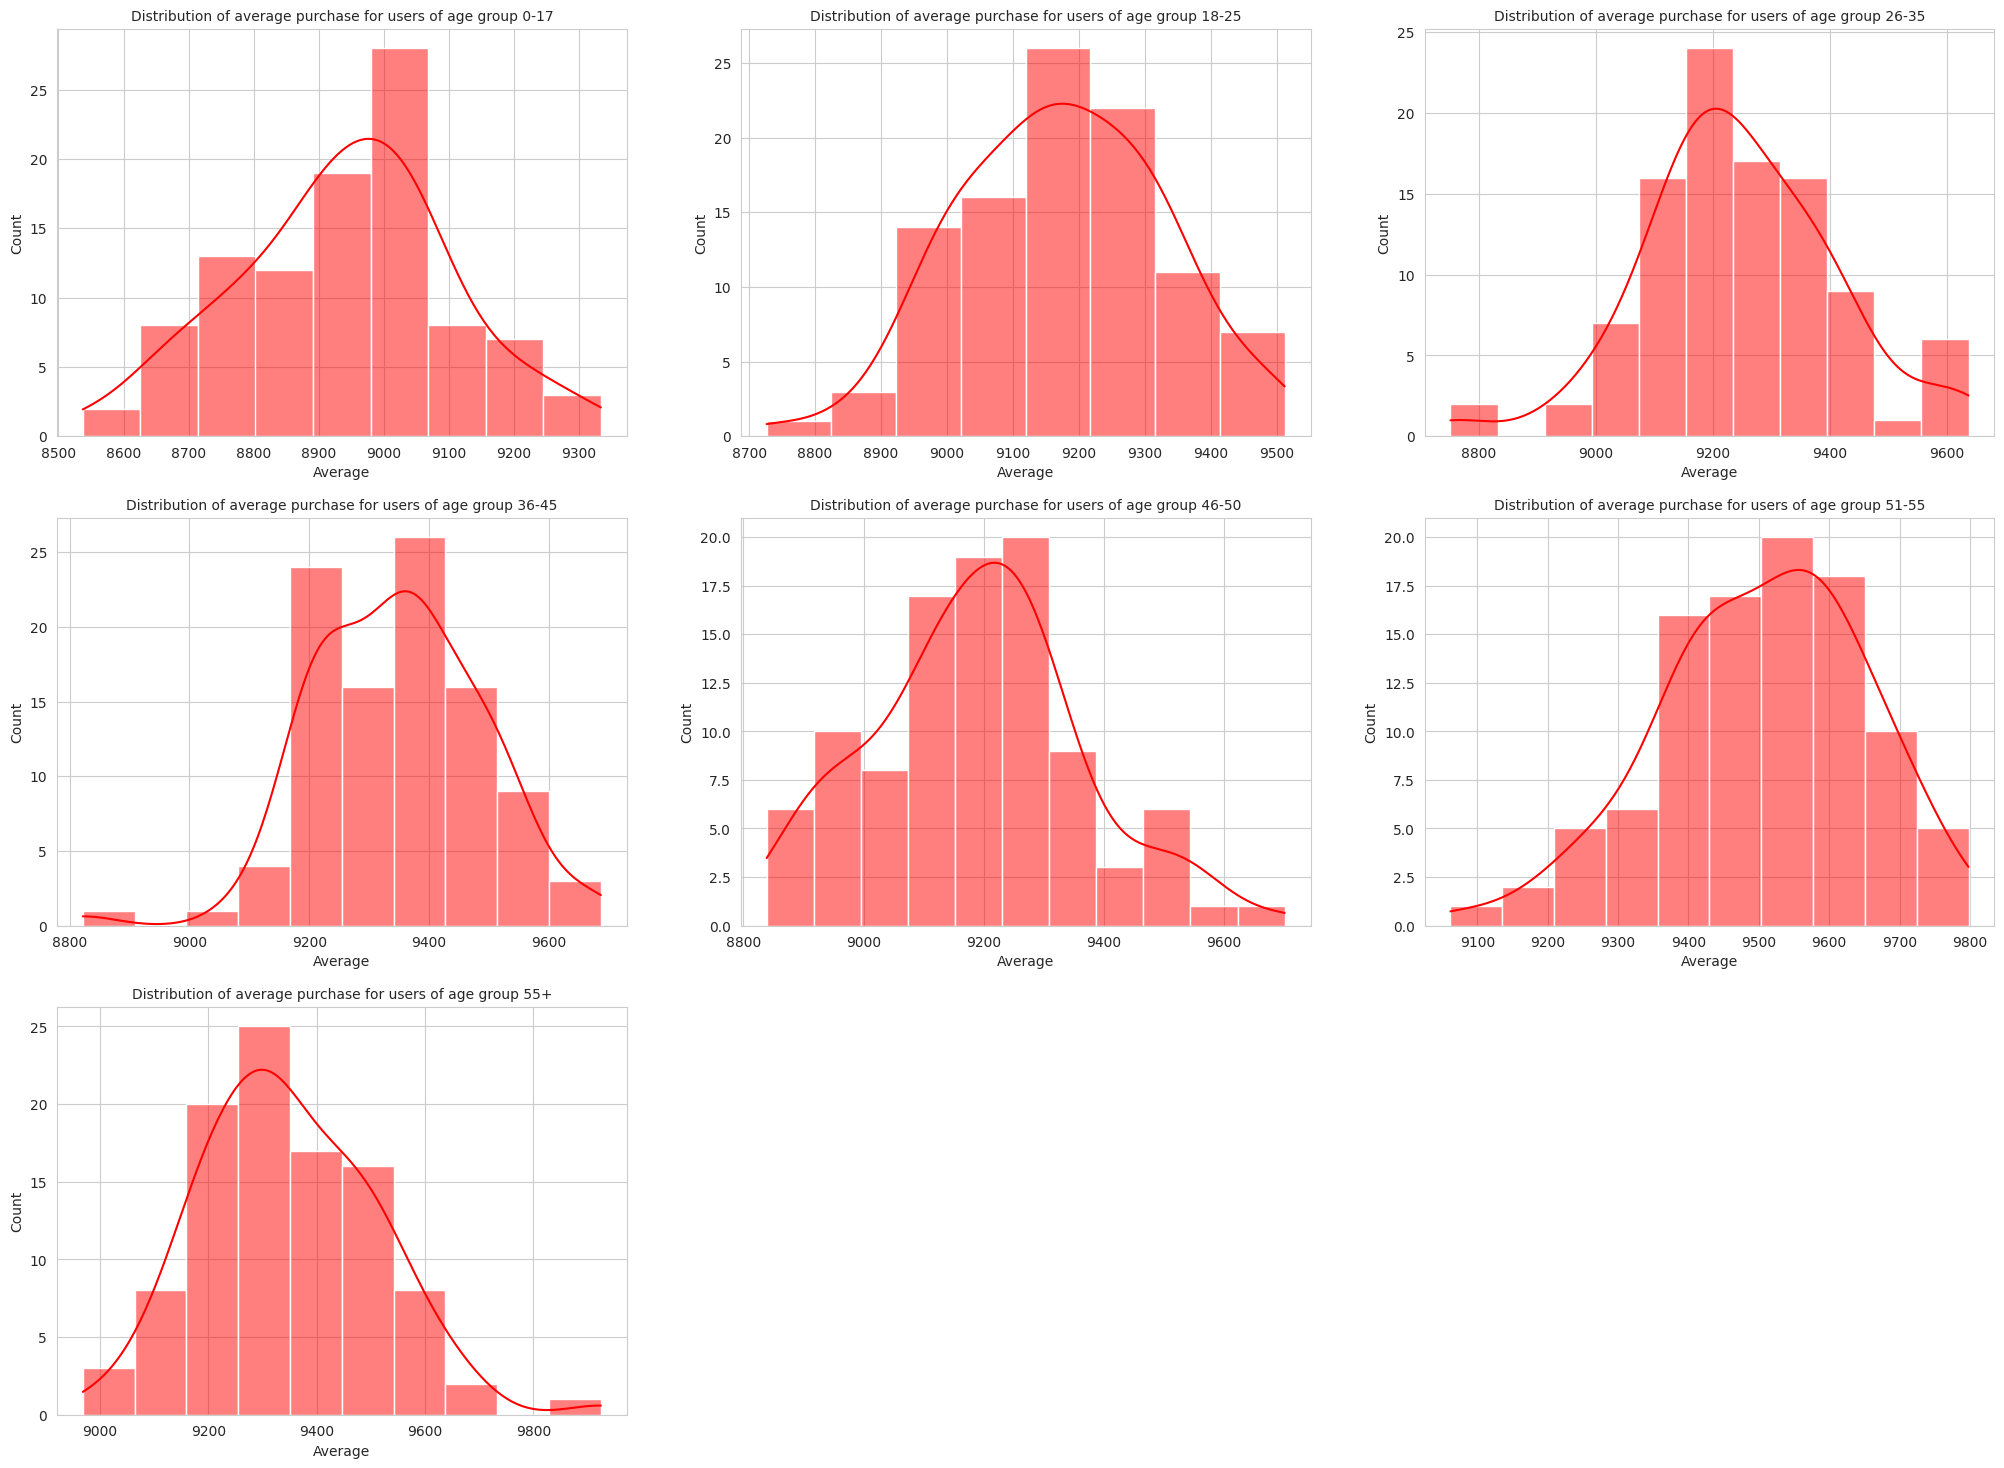

In [ ]:
# Taking 100 samples of 1000 entries for each age group and
# Plotting HIST/KDE plots to verify if their distribution looks gaussian

plt.figure(figsize=(25,18))
x = 1
for age_cat in ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']:
    means = []
    for i in range(100):
        temp = df_walmart.loc[df_walmart['Age'] == age_cat, 'Purchase'].sample(1000)
        avg = temp.mean()
        means.append(avg)
    plt.subplot(3,3,x)
    sns.histplot(x = means, kde=True, color = 'r')
    if age_cat == '0-17':
        means_0_17 = means
    elif age_cat == '18-25':
        means_18_25 = means
    elif age_cat == '26-35':
        means_26_35 = means
    elif age_cat == '36-45':
        means_36_45 = means
    elif age_cat == '46-50':
        means_46_50 = means
    elif age_cat == '51-55':
        means_51_55 = means
    elif age_cat == '55+':
        means_55 = means
    plt.title('Distribution of average purchase for users of age group {age}'.format(age = age_cat), fontsize=10)
    plt.xlabel('Average')
    x += 1
plt.show()

In [ ]:
# Finding confidence intervals for mean purchase for each age group
for age_cat in ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+' ]:
    print('For {age}-'.format(age = age_cat))
    if age_cat == '0-17':
        means = means_0_17
    elif age_cat == '18-25':
        means = means_18_25
    elif age_cat == '26-35':
        means = means_26_35
    elif age_cat == '36-45':
        means = means_36_45
    elif age_cat == '46-50':
        means = means_46_50
    elif age_cat == '51-55':
        means = means_51_55
    elif age_cat == '55+':
        means = means_55
    print('Mean of sample means =',np.mean(means).round(2))
    print('Population mean =', np.mean(df_walmart[df_walmart['Age']==age_cat]['Purchase'].mean()).round(2) )
    print('Standard deviation of means (Standard Error) =', np.std(means).round(2))
    print('Standard deviation of population =',df_walmart[df_walmart['Age'] == age_cat]['Purchase'].std().round(2) )
    print('99% CONFIDENCE INTERVAL for mean expense by users of age group {age}-'.format(age = age_cat))
    print((np.percentile(means, 0.5).round(2), np.percentile(means, 99.5).round(2)))
    print('95% CONFIDENCE INTERVAL for mean expense by users of age group {age}-'.format(age = age_cat))
    print((np.percentile(means, 2.5).round(2), np.percentile(means, 97.5).round(2)))
    print('90% CONFIDENCE INTERVAL for mean expense by users of age group {age}-'.format(age = age_cat))
    print((np.percentile(means, 5).round(2), np.percentile(means, 95).round(2)))
    print('*'*100)

For 0-17-
Mean of sample means = 8939.29
Population mean = 8933.46
Standard deviation of means (Standard Error) = 165.69
Standard deviation of population = 5111.11
99% CONFIDENCE INTERVAL for mean expense by users of age group 0-17-
(8538.68, 9318.72)
95% CONFIDENCE INTERVAL for mean expense by users of age group 0-17-
(8633.46, 9267.54)
90% CONFIDENCE INTERVAL for mean expense by users of age group 0-17-
(8666.11, 9212.42)
****************************************************************************************************
For 18-25-
Mean of sample means = 9172.81
Population mean = 9169.66
Standard deviation of means (Standard Error) = 154.15
Standard deviation of population = 5034.32
99% CONFIDENCE INTERVAL for mean expense by users of age group 18-25-
(8778.43, 9502.31)
95% CONFIDENCE INTERVAL for mean expense by users of age group 18-25-
(8896.9, 9474.82)
90% CONFIDENCE INTERVAL for mean expense by users of age group 18-25-
(8936.55, 9429.25)
****************************************

**Observations:**

1) 99% Confidence Interval for 0-17 is less than 51-55 without overlap.
We can say with 99% confidence that average purchase value of 0-17 is less compared to average purchase value of 51-55 age group.

**Insights**:

1) Products that cost between (9163.53, 9821.14) can be the target for 51-55 year age group.

2) Products that cost between (8626.28, 9228.37) can be the target for 0-17 year age group.

**Observations and Recommendations**

**Observations: **

1) Walmart has more 'Male' than 'Female' customers.

2) In general, 'Male' customers are spending than 'Female' customers - both in terms of average purchase as well as the overall revenue.

3) Unmarried people are buying more than married people.

4) Top 3 product categories are: 5, 1 & 8. Prioritize these product categories to improve their visibility in stores.

5) Top 3 occupations are: 4, 0 & 7. Target people in these top occupations.

6) Top 3 age groups are: 26-35, 36-45 and 18-25, esp. 26-35 as they they are making the most purchases. Target people in this age bracket.

7) People of city category 'B' are the biggest buyers at Walmart. Inventory in these cities must be boosted to ensure we have no shortages.

8) People who have spent between 1 to 2 years in their current city of stay are more likely to spend at Walmart.

9) Top 5 products are as follows:

**P00265242**    1880

**P00025442**    1615

**P00110742**    1612

**P00112142**    1562

**P00057642**    1470




**Recommendations**

1) Promotions to tap into the potential of city category B.

2) Promotions to tap into the potential of top 5 products by ensuring their visibility in all Walmart stores.

3) Promotions to maximize revenue potential for customers with stay in their current city between 1 to 2 years.

4) As people spend more than 2 years in their current city, their preference for Walmart seems to dip. Walmart should look into this issue, and devise a strategy to ensure loyalty of customers beyond 2 years into their current city.

5) As the unmarried customers buy more from Walmart, Walmart should keep doing things that are being done right today with respect to Unmarried customers.

6) Walmart should check what can be additionally done to increase the wallet share of Married customers.

7) Male customers buy more than female customers. Target 'Female' segment with gender specific promotions & come up with a clear strategy to get more wallet share from this gender.

8) There are certain age groups where affordability is higher & their share in Walmart revenue is higher than others. For example: 26-35 years age group. Walmart must ensure that NPS of this segment stays high through brand loyalty programs.

9)  Address different customer segments like 'Gender', 'Marital Status' and 'Age' based on their preference and purchase capacity.